<a href="https://colab.research.google.com/github/Rintaro0804/ai-practice/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データをダウンロード中...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

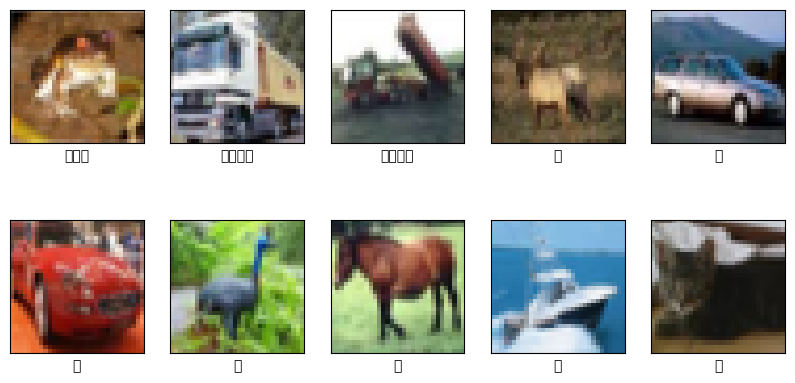

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


最終決戦：データ水増し学習スタート！
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 64ms/step - accuracy: 0.3324 - loss: 2.0715 - val_accuracy: 0.5242 - val_loss: 1.3749
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.5435 - loss: 1.2746 - val_accuracy: 0.5244 - val_loss: 1.4443
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.6077 - loss: 1.1030 - val_accuracy: 0.6976 - val_loss: 0.8806
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6576 - loss: 0.9762 - val_accuracy: 0.6619 - val_loss: 1.0238
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.6875 - loss: 0.8985 - val_accuracy: 0.7189 - val_loss: 0.8367
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7090 - loss: 0.8480 - val_accuracy: 0.7172 - val_loss: 0.8426
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.7247 - loss: 0.7961 - val_accuracy: 0.7331 - val_loss: 0.8135
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.7355 - loss: 0.7726 - val_accurac

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10 # これを使います！
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. データの読み込み（ネットから自動ダウンロードされます）
print("データをダウンロード中...")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. 前処理
# 画像の形は (50000, 32, 32, 3) です
# 0-255 を 0-1 に正規化
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# ラベルの名前（数字だとわからないので定義しておきます）
class_names = ['飛行機', '車', '鳥', '猫', '鹿',
               '犬', 'カエル', '馬', '船', 'トラック']

# どんな画像か見てみよう（最初の10枚を表示）
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    # y_train[i][0] に数字が入っている
    plt.xlabel(class_names[y_train[i][0]])
plt.show()
# --- ここから書き換え ---

model = keras.Sequential([
    # ブロック1: 32枚のフィルターでじっくり見る
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(), # 現場監督を追加！
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2), # 過学習防止

    # ブロック2: フィルターを64枚に倍増
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # ブロック3: さらに倍増して128枚
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # 最後: 分類パート
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# コンパイルと学習（学習回数を少し増やします）
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# --- ここから書き換え ---

# 1. 水増し設定（CIFAR-10専用チューニング）
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # 横にずらす
    height_shift_range=0.1, # 縦にずらす
    horizontal_flip=True,   # 【重要】左右反転（鏡写し）を許可
    rotation_range=15,      # 少し回転
    zoom_range=0.1          # 少しズーム
)

print("最終決戦：データ水増し学習スタート！")

# 2. 水増ししながら学習（20〜30エポック推奨）
# 時間がかかるので、とりあえず20エポックで様子を見ましょう
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_test, y_test)
)

# --- ここまで ---